# O jogos dos 8 números

### Definição:
Dado um arranjo aleatório do tabuleiro, fornecer a sequência de passos para chegar a solução (números ordenados)

![text](http://www.aiai.ed.ac.uk/~gwickler/images/8-puzzle-states.png)

In [0]:
# eightpuzzle.py
# --------------
# Licensing Information:  You are free to use or extend these projects for
# educational purposes provided that (1) you do not distribute or publish
# solutions, (2) you retain this notice, and (3) you provide clear
# attribution to UC Berkeley, including a link to http://ai.berkeley.edu.
# 
# Attribution Information: The Pacman AI projects were developed at UC Berkeley.
# The core projects and autograders were primarily created by John DeNero
# (denero@cs.berkeley.edu) and Dan Klein (klein@cs.berkeley.edu).
# Student side autograding was added by Brad Miller, Nick Hay, and
# Pieter Abbeel (pabbeel@cs.berkeley.edu).


import random


class EightPuzzleState:
    """
    The Eight Puzzle is described in the course textbook on
    page 64.
    This class defines the mechanics of the puzzle itself.  The
    task of recasting this puzzle as a search problem is left to
    the EightPuzzleSearchProblem class.
    """
    def __init__( self, numbers ):
        """
          Constructs a new eight puzzle from an ordering of numbers.
        numbers: a list of integers from 0 to 8 representing an
          instance of the eight puzzle.  0 represents the blank
          space.  Thus, the list
            [1, 0, 2, 3, 4, 5, 6, 7, 8]
          represents the eight puzzle:
            -------------
            | 1 |   | 2 |
            -------------
            | 3 | 4 | 5 |
            -------------
            | 6 | 7 | 8 |
            ------------
        The configuration of the puzzle is stored in a 2-dimensional
        list (a list of lists) 'cells'.
        """
        self.cells = []
        numbers = numbers[:] # Make a copy so as not to cause side-effects.
        numbers.reverse()
        for row in range( 3 ):
            self.cells.append( [] )
            for col in range( 3 ):
                self.cells[row].append( numbers.pop() )
                if self.cells[row][col] == 0:
                    self.blankLocation = row, col

    def isGoal( self ):
        """
          Checks to see if the puzzle is in its goal state.
            -------------
            |   | 1 | 2 |
            -------------
            | 3 | 4 | 5 |
            -------------
            | 6 | 7 | 8 |
            -------------
        >>> EightPuzzleState([0, 1, 2, 3, 4, 5, 6, 7, 8]).isGoal()
        True
        >>> EightPuzzleState([1, 0, 2, 3, 4, 5, 6, 7, 8]).isGoal()
        False
        """
        current = 0
        for row in range( 3 ):
            for col in range( 3 ):
                if current != self.cells[row][col]:
                    return False
                current += 1
        return True

    def legalMoves( self ):
        """
          Returns a list of legal moves from the current state.
        Moves consist of moving the blank space up, down, left or right.
        These are encoded as 'up', 'down', 'left' and 'right' respectively.
        >>> EightPuzzleState([0, 1, 2, 3, 4, 5, 6, 7, 8]).legalMoves()
        ['down', 'right']
        """
        moves = []
        row, col = self.blankLocation
        if(row != 0):
            moves.append('up')
        if(row != 2):
            moves.append('down')
        if(col != 0):
            moves.append('left')
        if(col != 2):
            moves.append('right')
        return moves

    def result(self, move):
        """
          Returns a new eightPuzzle with the current state and blankLocation
        updated based on the provided move.
        The move should be a string drawn from a list returned by legalMoves.
        Illegal moves will raise an exception, which may be an array bounds
        exception.
        NOTE: This function *does not* change the current object.  Instead,
        it returns a new object.
        """
        row, col = self.blankLocation
        if(move == 'up'):
            newrow = row - 1
            newcol = col
        elif(move == 'down'):
            newrow = row + 1
            newcol = col
        elif(move == 'left'):
            newrow = row
            newcol = col - 1
        elif(move == 'right'):
            newrow = row
            newcol = col + 1
        else:
            raise "Illegal Move"

        # Create a copy of the current eightPuzzle
        newPuzzle = EightPuzzleState([0, 0, 0, 0, 0, 0, 0, 0, 0])
        newPuzzle.cells = [values[:] for values in self.cells]
        # And update it to reflect the move
        newPuzzle.cells[row][col] = self.cells[newrow][newcol]
        newPuzzle.cells[newrow][newcol] = self.cells[row][col]
        newPuzzle.blankLocation = newrow, newcol
        return newPuzzle

    # Utilities for comparison and display
    def __eq__(self, other):
        """
            Overloads '==' such that two eightPuzzles with the same configuration
          are equal.
          >>> EightPuzzleState([0, 1, 2, 3, 4, 5, 6, 7, 8]) == \
              EightPuzzleState([1, 0, 2, 3, 4, 5, 6, 7, 8]).result('left')
          True
        """
        for row in range( 3 ):
            if self.cells[row] != other.cells[row]:
                return False
        return True

    def __hash__(self):
        return hash(str(self.cells))

    def __getAsciiString(self):
        """
          Returns a display string for the maze
        """
        lines = []
        horizontalLine = ('-' * (13))
        lines.append(horizontalLine)
        for row in self.cells:
            rowLine = '|'
            for col in row:
                if col == 0:
                    col = ' '
                rowLine = rowLine + ' ' + col.__str__() + ' |'
            lines.append(rowLine)
            lines.append(horizontalLine)
        return '\n'.join(lines)

    def __str__(self):
        return self.__getAsciiString()


## Criando uma instância do jogo:

In [2]:
print(EightPuzzleState(numbers=[1, 0, 2, 3, 4, 5, 6, 7, 8]))

-------------
| 1 |   | 2 |
-------------
| 3 | 4 | 5 |
-------------
| 6 | 7 | 8 |
-------------


## Algumas funcões auxiliares

In [0]:
EIGHT_PUZZLE_DATA = [[1, 0, 2, 3, 4, 5, 6, 7, 8],
                     [1, 7, 8, 2, 3, 4, 5, 6, 0],
                     [4, 3, 2, 7, 0, 5, 1, 6, 8],
                     [5, 1, 3, 4, 0, 2, 6, 7, 8],
                     [1, 2, 5, 7, 6, 8, 0, 4, 3],
                     [0, 3, 1, 6, 8, 2, 7, 5, 4]]

def loadEightPuzzle(puzzleNumber):
    """
      puzzleNumber: The number of the eight puzzle to load.
      Returns an eight puzzle object generated from one of the
      provided puzzles in EIGHT_PUZZLE_DATA.
      puzzleNumber can range from 0 to 5.
      >>> print loadEightPuzzle(0)
      -------------
      | 1 |   | 2 |
      -------------
      | 3 | 4 | 5 |
      -------------
      | 6 | 7 | 8 |
      -------------
    """
    return EightPuzzleState(EIGHT_PUZZLE_DATA[puzzleNumber])

def createRandomEightPuzzle(moves=100):
    """
      moves: number of random moves to apply
      Creates a random eight puzzle by applying
      a series of 'moves' random moves to a solved
      puzzle.
    """
    puzzle = EightPuzzleState([0,1,2,3,4,5,6,7,8])
    for i in range(moves):
        # Execute a random legal move
        puzzle = puzzle.result(random.sample(puzzle.legalMoves(), 1)[0])
    return puzzle

In [4]:
print(loadEightPuzzle(puzzleNumber=1))

-------------
| 1 | 7 | 8 |
-------------
| 2 | 3 | 4 |
-------------
| 5 | 6 |   |
-------------


## Definindo o problema em termos de buscas

In [0]:
class SearchProblem:
    """
    This class outlines the structure of a search problem, but doesn't implement
    any of the methods (in object-oriented terminology: an abstract class).
    You do not need to change anything in this class, ever.
    """

    def getStartState(self):
        """
        Returns the start state for the search problem.
        """
        raise NotImplementedError()

    def isGoalState(self, state):
        """
          state: Search state
        Returns True if and only if the state is a valid goal state.
        """
        raise NotImplementedError()

    def getSuccessors(self, state):
        """
          state: Search state
        For a given state, this should return a list of triples, (successor,
        action, stepCost), where 'successor' is a successor to the current
        state, 'action' is the action required to get there, and 'stepCost' is
        the incremental cost of expanding to that successor.
        """
        raise NotImplementedError()

    def getCostOfActions(self, actions):
        """
         actions: A list of actions to take
        This method returns the total cost of a particular sequence of actions.
        The sequence must be composed of legal moves.
        """
        raise NotImplementedError()
        
class EightPuzzleSearchProblem(SearchProblem):
    """
      Implementation of a SearchProblem for the  Eight Puzzle domain
      Each state is represented by an instance of an eightPuzzle.
    """
    def __init__(self,puzzle):
        "Creates a new EightPuzzleSearchProblem which stores search information."
        self.puzzle = puzzle

    def getStartState(self):
        return puzzle

    def isGoalState(self,state):
        return state.isGoal()

    def getSuccessors(self,state):
        """
          Returns list of (successor, action, stepCost) pairs where
          each succesor is either left, right, up, or down
          from the original state and the cost is 1.0 for each
        """
        from random import shuffle
        succ = []
        for a in state.legalMoves():
            succ.append((state.result(a), a, 1))
        shuffle(succ)
        return succ

    def getCostOfActions(self, actions):
        """
         actions: A list of actions to take
        This method returns the total cost of a particular sequence of actions.  The sequence must
        be composed of legal moves
        """
        return len(actions)

Testando:

In [6]:
puzzle = loadEightPuzzle(puzzleNumber=1)
print(puzzle)
print(puzzle.legalMoves())

-------------
| 1 | 7 | 8 |
-------------
| 2 | 3 | 4 |
-------------
| 5 | 6 |   |
-------------
['up', 'left']


In [7]:
search_problem = EightPuzzleSearchProblem(puzzle)

for p in search_problem.getSuccessors(puzzle):
  print(p[1])
  print(p[0])
  print('isGoal?', search_problem.isGoalState(p[0]))
  print()

up
-------------
| 1 | 7 | 8 |
-------------
| 2 | 3 |   |
-------------
| 5 | 6 | 4 |
-------------
isGoal? False

left
-------------
| 1 | 7 | 8 |
-------------
| 2 | 3 | 4 |
-------------
| 5 |   | 6 |
-------------
isGoal? False



# Exercício

In [0]:
number_game = 2
x_values = []
y_values = {'path':[], 'loops':[]}

puzzle = loadEightPuzzle(puzzleNumber=number_game)
search_problem = EightPuzzleSearchProblem(puzzle)

In [0]:
def printPlot(x_values, y_values, title):
  from matplotlib import pyplot

  fig = pyplot.gcf()
  fig.set_size_inches(21, 9)

  pyplot.bar(x_values, y_values)
  pyplot.title(title)

  pyplot.show()
  
def pathStringTolist(paths):
  result = []
  for path in paths:
    result.append(path[1:].split('#'))
  
  return result

def lenPaths(paths):
  return [ len(x) for x in pathStringTolist(y_values['path']) ]

def saveResult(result, algorithm_name='no name'):
  global x_values
  global y_values
  
  x_values.append(algorithm_name)
  y_values['path'].append(result[0][1])
  y_values['loops'].append(result[1])
  
  
def printResult(result):
  print(result[0])


## Exercicio 1:
Implemente o algoritmo de Busca em Largura que recebe uma instância de `SearchProblem`:

In [0]:
def breadthFirstSearch(search_problem):
    """
    Search the shallowest nodes in the search tree first.
    *** YOUR CODE HERE ***
    """
    #raise NotImplementedError()
    fringe = [] + [ (search_problem.getStartState(), '', 0) ]
    visited = []
    count = 0
    
    while 1:
      count += 1
      result = fringe.pop(0)
      
      if(count % 10000 == 0):
        print('Interation:', count, 'Fringe len:', len(fringe),result[1])
      
      if(search_problem.isGoalState(result[0])):
        print("Loops:", count)
        return (result, count)
      
      succ = search_problem.getSuccessors(result[0])
      
      for state in succ:
        if(not state[0] in visited):
          visited.append(state[0])
          path = result[1] + "#" + state[1]
          cost = result[2] + state[2]
          fringe.append((state[0], path, cost))

In [11]:
result = breadthFirstSearch(search_problem)
saveResult(result, 'BFS')
printResult(result)

Loops: 847
(<__main__.EightPuzzleState object at 0x7faa448960f0>, '#left#down#right#up#left#up#right#down#left#up', 10)


## Exercicio 2:
Implemente o algoritmo de Busca em Profundidade que recebe uma instância de `SearchProblem`:

In [0]:
def depthFirstSearch(problem):
    """
    *** YOUR CODE HERE ***
    """
    #raise NotImplementedError()
    fringe = [] + [ (search_problem.getStartState(), '', 0) ]
    visited = []
    count = 0
    
    while 1:
      count += 1
      result = fringe.pop(-1)
      
      if(count % 2500 == 0):
        print('Interation:', count, 'Fringe len:', len(fringe),result[1])
      
      if(search_problem.isGoalState(result[0])):
        print("Loops:", count)
        return (result, count)
      
      succ = search_problem.getSuccessors(result[0])
      
      for state in succ:
        if(not state[0] in visited):
          visited.append(state[0])
          path = result[1] + "#" + state[1]
          cost = result[2] + state[2]
          fringe.append((state[0], path, cost))

In [13]:
result = depthFirstSearch(search_problem)
saveResult(result, 'DFS')
printResult(result)

Interation: 2500 Fringe len: 2036 #down#right#up#up#left#down#right#down#left#left#up#up#right#down#right#down#left#up#up#left#down#down#right#up#left#up#right#right#down#left#left#up#right#down#down#right#up#left#left#down#right#right#up#left#up#left#down#right#up#right#down#down#left#up#left#up#right#down#left#up#right#down#left#down#right#up#left#down#right#right#up#left#down#left#up#up#right#right#down#left#down#left#up#right#right#up#left#down#down#left#up#up#right#down#left#up#right#down#left#up#right#right#down#left#left#up#right#down#right#up#left#left#down#right#down#right#up#up#left#down#down#left#up#up#right#right#down#down#left#up#up#left#down#right#right#down#left#left#up#up#right#right#down#down#left#up#left#down#right#right#up#left#left#down#right#right#up#left#down#right#up#left#left#down#right#right#up#left#left#up#right#right#down#down#left#up#right#up#left#left#down#down#right#right#up#left#left#up#right#down#left#down#right#up#up#left#down#down#right#up#left#up#righ

## Exercicio 3:
Implemente o algoritmo de Busca de Custo Uniforme que recebe uma instância de `SearchProblem`:

In [0]:
def uniformCostSearch(problem):
    """
    *** YOUR CODE HERE ***
    """
    #raise NotImplementedError()
    fringe = [] + [ (search_problem.getStartState(), '', 0) ]
    visited = []
    count = 0
    
    while 1:
      count += 1
      fringe = sorted(fringe, key=lambda x: x[2])
      result = fringe.pop(0)
      
      if(count % 10000 == 0):
        print('Interation:', count, 'Fringe len:', len(fringe),result[1])
      
      if(search_problem.isGoalState(result[0])):
        print("Loops:", count)
        return (result, count)
      
      succ = search_problem.getSuccessors(result[0])
      
      for state in succ:
        if(not state[0] in visited):
          visited.append(state[0])
          path = result[1] + "#" + state[1]
          cost = result[2] + state[2]
          fringe.append((state[0], path, cost))

In [15]:
result = uniformCostSearch(search_problem)
saveResult(result, 'UCS')
printResult(result)

Loops: 664
(<__main__.EightPuzzleState object at 0x7faa4122e630>, '#left#down#right#up#left#up#right#down#left#up', 10)


## Exercicio 4:
Implemente uma heurística para o problema e o algoritmo de Busca A* que recebe uma instância de `SearchProblem`:

In [0]:
def heuristicEightNumbers(puzzle):
    #raise NotImplementedError()
    plan_puzzle = []
    result = 0
    
    for row in puzzle.cells:
      plan_puzzle = plan_puzzle + row
      
    for i in range(len(plan_puzzle)):
      if(plan_puzzle[i] != i):
        result += 1
        
    return result

def aStarSearch(problem):
    """
    *** YOUR CODE HERE ***
    """
    #raise NotImplementedError()
    fringe = [] + [ (search_problem.getStartState(), '', 0) ]
    visited = []
    count = 0
    
    while 1:
      #print(len(fringe), end=',')
      count += 1
      fringe = sorted(fringe, key=lambda x: x[2])
      result = fringe.pop(0)
      
      if(count % 10000 == 0):
        print('Interation:', count, 'Fringe len:', len(fringe),result[1])
      
      if(search_problem.isGoalState(result[0])):
        print("Loops:", count)
        return (result, count)
      
      succ = search_problem.getSuccessors(result[0])
      
      for state in succ:
        if(not state[0] in visited):
          visited.append(state[0])
          path = result[1] + "#" + state[1]
          cost = result[2] + state[2] + heuristicEightNumbers(state[0])
          fringe.append((state[0], path, cost))

In [17]:
result = aStarSearch(search_problem)
saveResult(result, 'A*')
printResult(result)

Loops: 120
(<__main__.EightPuzzleState object at 0x7faa448fd6d8>, '#left#down#right#up#left#up#right#down#left#up', 47)


## Exercicio 5:
Compare os resultados obtidos por cada algoritmo

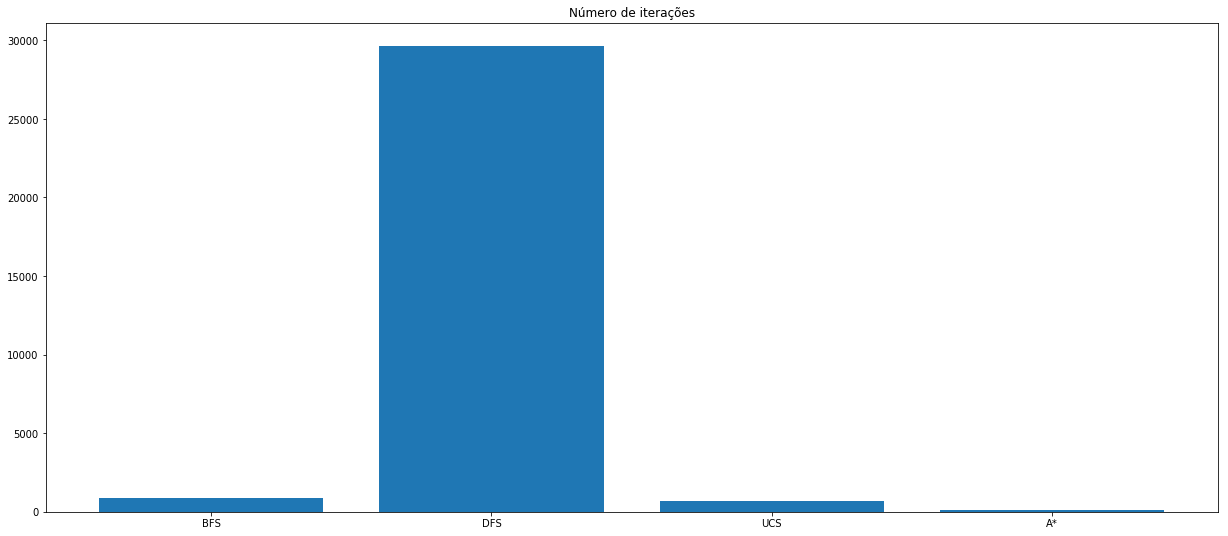

In [18]:
printPlot(x_values, y_values['loops'], "Número de iterações")

('BFS', ['left', 'down', 'right', 'up', 'left', 'up', 'right', 'down', 'left', 'up'])
('DFS', ['down', 'right', 'up', 'up', 'left', 'down', 'right', 'down', 'left', 'left', 'up', 'up', 'right', 'down', 'right', 'down', 'left', 'up', 'up', 'left', 'down', 'down', 'right', 'up', 'left', 'up', 'right', 'right', 'down', 'left', 'left', 'up', 'right', 'down', 'down', 'right', 'up', 'left', 'left', 'down', 'right', 'right', 'up', 'left', 'up', 'left', 'down', 'right', 'up', 'right', 'down', 'down', 'left', 'up', 'left', 'up', 'right', 'down', 'left', 'up', 'right', 'down', 'left', 'down', 'right', 'up', 'left', 'down', 'right', 'right', 'up', 'left', 'down', 'left', 'up', 'up', 'right', 'right', 'down', 'left', 'down', 'left', 'up', 'right', 'right', 'up', 'left', 'down', 'down', 'left', 'up', 'up', 'right', 'down', 'left', 'up', 'right', 'down', 'left', 'up', 'right', 'right', 'down', 'left', 'left', 'up', 'right', 'down', 'right', 'up', 'left', 'left', 'down', 'right', 'down', 'right', 'up

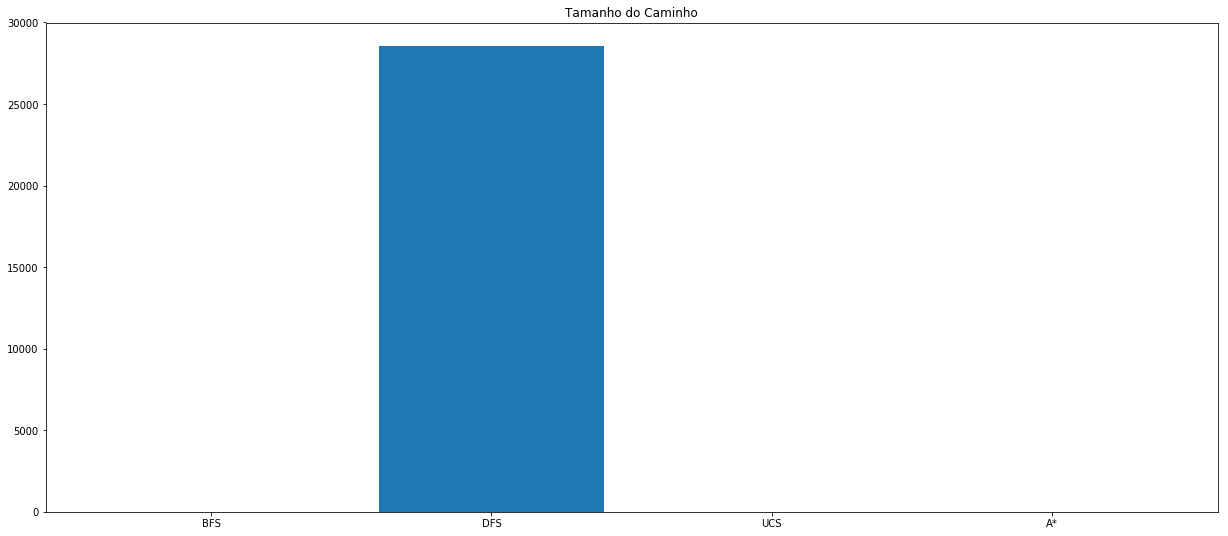

In [19]:
for x in list( zip( x_values, pathStringTolist(y_values['path']) ) ):
  print(x)
  
printPlot(x_values, lenPaths(y_values['path']), "Tamanho do Caminho")